In [1]:
######### IMPORTING NECESSARY MODULES #########
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
import sys
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

sys.path.append('/home/ironman/abhishek/AliProducts/architectures/')
sys.path.append('/home/ironman/abhishek/AliProducts/Helper/')
from dataloader import mydataset, create_prime_dict 
from trainer import train, test_classify, eval_classify
from efficientnet import *
from Load_model import load
from plot_curves import plot_loss, plot_acc

In [2]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:2


**Dataloading Scheme**

In [3]:
trainlist = '/home/ironman/abhishek/AliProducts/Newlist/NEW_train_list1.txt'
validlist = '/home/ironman/abhishek/AliProducts/Newlist/NEW_valid_list1.txt'

In [4]:
prime_dict = create_prime_dict(trainlist)

Number of classes =  50030


In [5]:
#### Train Dataloader #### 
train_dataset = mydataset(trainlist, prime_dict, name='train')          
train_dataloader = data.DataLoader(train_dataset, shuffle= True, batch_size = 256, num_workers=16,pin_memory=True)


#### Validation Dataloader #### 
validation_dataset = mydataset(validlist, prime_dict, name='valid')         
validation_dataloader = data.DataLoader(validation_dataset, shuffle=False, batch_size = 64, num_workers=16,pin_memory=True)

**Model Definition**

In [6]:
model = EfficientNet.from_pretrained('efficientnet-b1', num_classes = 50030)

model = nn.DataParallel(model,device_ids=[2,3]).to(device)
model

Loaded pretrained weights for efficientnet-b1


DataParallel(
  (module): EfficientNet(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_

**Hyperparameters**

In [7]:
## Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-4, momentum=0.9)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size= 25, gamma = 0.1)

# Epochs
num_Epochs = 90

In [8]:
modelname = 'New_Data_Apro_AA_Cutout_EB4'
modelpath = '/home/ironman/abhishek/saved_model_checkpoints/AliProducts/'+modelname


In [9]:
writer = SummaryWriter(modelname)

train(model, train_dataloader, validation_dataloader, criterion, optimizer, lr_scheduler, modelpath, writer, device, epochs = num_Epochs)

writer.flush()
writer.close()

loss 10.875374240875244
loss 21.40119930267334
loss 31.474676504135132
loss 41.018507947921755
loss 50.027185621261594
loss 58.48823525428772
loss 66.39914549350739
loss 73.79642375946045
loss 80.7872084760666
loss 87.35523881912232
loss 93.59308490753173
loss 99.5039008140564
loss 105.11004096984863
loss 110.46933645248413
loss 115.67984777450562
loss 120.69465416908264
loss 125.53975365638733
loss 130.29283402204513
loss 134.84975261211395
loss 139.39749851703644
loss 143.81729031801223
loss 148.1028567314148
loss 152.28740742206574
loss 156.43959990262985
loss 160.50460388183595
loss 164.53945883512498
loss 168.50371052026748
loss 172.45160319566727
loss 176.30515181541443
loss 180.11538854122162
loss 183.85879071235658
loss 187.52464338064195
loss 191.20842149734497
loss 194.86319331884386
loss 198.44136847734453
loss 201.98718685388565
loss 205.53763853549958
loss 209.0610853099823
loss 212.5755342054367
loss 216.05949625968933
loss 219.5045344352722
loss 222.9389777970314
loss 22

loss 15.702332139015198
loss 17.763293837308883
loss 19.88459294438362
loss 22.002492954730986
loss 24.132478152513503
loss 26.304765157699585
loss 28.491727666854857
loss 30.704017535448074
loss 32.93958483099937
loss 35.1592644560337
loss 37.37811470627785
loss 39.62011539459228
loss 41.89962891578674
loss 44.20821425318718
loss 46.51919836640358
loss 48.89334097743034
loss 51.21882918119431
loss 53.576948137283324
loss 55.93154453992844
loss 58.29400796890259
loss 60.67954214096069
loss 63.07305860042572
loss 65.4928748869896
loss 67.92601506471634
loss 70.3405402636528
loss 72.7703059208393
loss 75.2459460425377
loss 77.70355123400688
loss 80.14145565390587
loss 82.62252972245216
loss 85.07736855983734
loss 87.55953185558319
loss 90.04602410674096
loss 92.59464856624604
loss 95.09056990981102
loss 97.58615517616272
loss 100.05683620095253
Epoch:  8
training loss =  2.2760625489513497
Validation Loss: 1.7820	Top 1 Validation Accuracy: 0.6769	 Top 5 Validation Accuracy: 0.8638
loss 1

loss 20.26808477163315
loss 22.259661625623703
loss 24.25773979783058
loss 26.298776738643646
loss 28.364266715049745
loss 30.449648215770722
loss 32.578835223913195
loss 34.718184152841566
loss 36.84542257547378
loss 39.00305196881294
loss 41.14963093996048
loss 43.317818942070005
loss 45.53989016294479
loss 47.73351854085922
loss 50.00366534233093
loss 52.24552729725838
loss 54.47360140562058
loss 56.742977454662324
loss 59.0404035782814
loss 61.35142465591431
loss 63.720186239480974
loss 66.01763167023658
loss 68.32724645018578
loss 70.67073402285575
loss 73.02767296433449
loss 75.39003465294837
loss 77.73962005376816
loss 80.09700637221336
loss 82.4993152475357
loss 84.89311079263688
loss 87.3371852338314
loss 89.77523282766342
loss 92.1911624455452
loss 94.61389221191406
Epoch:  15
training loss =  2.1534393120541155
Validation Loss: 1.7436	Top 1 Validation Accuracy: 0.6896	 Top 5 Validation Accuracy: 0.8717
loss 1.7964167165756226
loss 3.5295990884304045
loss 5.312365013360977
lo

loss 31.63060555934906
loss 33.71944102168083
loss 35.810155124664306
loss 37.89219779729843
loss 40.041401578187944
loss 42.14710013628006
loss 44.292159821987156
loss 46.48642778992653
loss 48.66945001125336
loss 50.847321937084196
loss 53.0591305243969
loss 55.34207416892052
loss 57.59782230138779
loss 59.83480796098709
loss 62.124793112277985
loss 64.41624012351036
loss 66.74943262815475
loss 69.0486149930954
loss 71.35802935004234
loss 73.68935399532319
loss 76.00702236056328
loss 78.29294698238373
loss 80.61603753924369
loss 82.93476153969765
loss 85.26970875382423
loss 87.65628899216652
loss 90.03774617910385
loss 92.43906639695167
Epoch:  22
training loss =  2.104485863778252
Validation Loss: 1.8866	Top 1 Validation Accuracy: 0.6695	 Top 5 Validation Accuracy: 0.8518
loss 1.7312345933914184
loss 3.409169718027115
loss 5.075835098028183
loss 6.76614074587822
loss 8.550625054836273
loss 10.335579771995544
loss 12.147730456590653
loss 13.949264795780183
loss 15.797476999759674
los

loss 17.25132340967655
loss 18.017472996115686
loss 18.77618090212345
loss 19.558118115067483
loss 20.323514173030855
loss 21.091282893419265
loss 21.855398855507374
loss 22.627952509224414
loss 23.40402360767126
loss 24.18343478292227
loss 24.948855155706404
loss 25.721387891173364
loss 26.49979249179363
loss 27.289563154578207
loss 28.071989691853524
loss 28.862769967615606
loss 29.652802599966527
loss 30.43570271641016
loss 31.227389580905438
loss 32.0110476449132
loss 32.79194813340902
loss 33.60332978636026
Epoch:  29
training loss =  0.764216388608194
Validation Loss: 0.9698	Top 1 Validation Accuracy: 0.8043	 Top 5 Validation Accuracy: 0.9470
loss 0.6668948403000832
loss 1.3435235899686813
loss 2.041165782213211
loss 2.709504510164261
loss 3.397061396241188
loss 4.094471094012261
loss 4.77429977029562
loss 5.452934154868126
loss 6.151745945811272
loss 6.8476156482100485
loss 7.549411516189576
loss 8.255317469835282
loss 8.971371530294418
loss 9.658212115764618
loss 10.34269251763

loss 13.222921629846097
loss 13.787799716591834
loss 14.370193922519684
loss 14.94114553272724
loss 15.527637027204037
loss 16.12811576485634
loss 16.72051582068205
loss 17.319390126764773
loss 17.9089672639966
loss 18.50238800019026
loss 19.099943423271178
loss 19.696308417022227
loss 20.292447155416014
loss 20.90373951792717
loss 21.502294678092003
loss 22.09537074714899
loss 22.708315377533435
loss 23.33069517225027
loss 23.959388059973715
loss 24.581276488006115
loss 25.19579944342375
Epoch:  36
training loss =  0.5731725627541784
Validation Loss: 0.9765	Top 1 Validation Accuracy: 0.8042	 Top 5 Validation Accuracy: 0.9477
loss 0.5146600958704949
loss 1.0242059740424156
loss 1.5500974324345589
loss 2.0754282158613204
loss 2.587599947154522
loss 3.112829033434391
loss 3.6272482293844224
loss 4.157472320795059
loss 4.692126289606095
loss 5.226095394194126
loss 5.769787258505821
loss 6.321131386458874
loss 6.868125704526901
loss 7.40477543503046
loss 7.9471746039390565
loss 8.492546265

loss 12.96856595814228
loss 13.502764807343484
loss 14.03342140197754
loss 14.576700930297374
loss 15.103470245301724
loss 15.641306881606578
loss 16.19576963573694
loss 16.749878614246846
loss 17.303910370469094
loss 17.859984980821608
loss 18.40901926547289
loss 18.95921140640974
loss 19.51164209663868
loss 20.059511937499046
loss 20.627392826974393
loss 21.193562412559984
loss 21.766646702885627
loss 22.330784825980665
loss 22.90411852389574
Epoch:  43
training loss =  0.5210421128449398
Validation Loss: 1.0098	Top 1 Validation Accuracy: 0.7999	 Top 5 Validation Accuracy: 0.9458
loss 0.4680595675110817
loss 0.9317349517345428
loss 1.40240732640028
loss 1.8702544045448304
loss 2.3448218619823455
loss 2.8109668895602224
loss 3.286072380542755
loss 3.7521166905760763
loss 4.241350918114185
loss 4.721282683312893
loss 5.209665921628475
loss 5.696294907033444
loss 6.183943541347981
loss 6.689575497210026
loss 7.194012448191643
loss 7.698284486532211
loss 8.199379979372024
loss 8.72112064

loss 13.442787477076054
loss 13.961836277842522
loss 14.49891935378313
loss 15.020613265633584
loss 15.556680866777898
loss 16.098276619017124
loss 16.6425755161047
loss 17.181098186075687
loss 17.728088488280772
loss 18.257546909749507
loss 18.794610227942467
loss 19.33372141510248
loss 19.87910535424948
loss 20.431598965227604
loss 20.99210347533226
loss 21.55100520312786
loss 22.105797338187696
Epoch:  50
training loss =  0.5031458547417169
Validation Loss: 1.0718	Top 1 Validation Accuracy: 0.7974	 Top 5 Validation Accuracy: 0.9438
loss 0.4237370103597641
loss 0.8249332673847676
loss 1.2223854149878024
loss 1.614367929250002
loss 2.010290262550116
loss 2.406660322993994
loss 2.791627639681101
loss 3.1718933399021627
loss 3.5443002851307392
loss 3.9275000897049903
loss 4.306921772956848
loss 4.683691252171993
loss 5.055668685436249
loss 5.429601860493421
loss 5.80297678783536
loss 6.183383448272943
loss 6.557593736946583
loss 6.923599415719509
loss 7.286100924164057
loss 7.6581415577

loss 9.677412516027688
loss 10.015420989096164
loss 10.349331036657095
loss 10.688004787266255
loss 11.016556103527545
loss 11.357689398825169
loss 11.69140193492174
loss 12.028760516047477
loss 12.361927673667669
loss 12.71184699356556
loss 13.04963277578354
loss 13.381636505424977
loss 13.72752753123641
loss 14.062985262274742
loss 14.399030638039113
loss 14.73541238039732
Epoch:  57
training loss =  0.33503689331930087
Validation Loss: 0.8995	Top 1 Validation Accuracy: 0.8195	 Top 5 Validation Accuracy: 0.9557
loss 0.3300574226677418
loss 0.6565181508660316
loss 0.9903267700970173
loss 1.3187013903260232
loss 1.6526342469453812
loss 1.982948307543993
loss 2.312123523503542
loss 2.6447066748142243
loss 2.9704812191426755
loss 3.305407686084509
loss 3.6304995664954185
loss 3.9671218571066857
loss 4.2961364825069905
loss 4.627268723398447
loss 4.956630871444941
loss 5.285664870291948
loss 5.618885183930397
loss 5.963361793160439
loss 6.2869034041464325
loss 6.619538692831993
loss 6.949

loss 12.59126596853137
loss 12.9366948287189
loss 13.271713809370995
loss 13.616084069758653
loss 13.953323653042316
loss 14.290149700641631
loss 14.623927621990441
Epoch:  64
training loss =  0.33248506076273715
Validation Loss: 0.9117	Top 1 Validation Accuracy: 0.8199	 Top 5 Validation Accuracy: 0.9561
loss 0.32780040338635447
loss 0.6554232269525528
loss 0.9872631420195103
loss 1.3082494960725308
loss 1.6416870698332786
loss 1.968280574977398
loss 2.305222492963076
loss 2.636807836443186
loss 2.9600506748259066
loss 3.2875244195759294
loss 3.616559128165245
loss 3.9526037050783636
loss 4.276094987243414
loss 4.605911467075348
loss 4.936535401046276
loss 5.264427506476641
loss 5.58341616526246
loss 5.91234770283103
loss 6.243160739094019
loss 6.58088613525033
loss 6.915633104294539
loss 7.251119567900896
loss 7.582171540409327
loss 7.924927639365197
loss 8.257879970520735
loss 8.59217056825757
loss 8.93174665004015
loss 9.266494608521462
loss 9.602015093415975
loss 9.939859960526228


loss 12.558726343363524
loss 12.898511531800033
loss 13.234275955408812
loss 13.573274976313114
loss 13.912609938681125
loss 14.244505036473274
loss 14.577328796684743
Epoch:  71
training loss =  0.33163482408483885
Validation Loss: 0.9033	Top 1 Validation Accuracy: 0.8231	 Top 5 Validation Accuracy: 0.9582
loss 0.32398226514458656
loss 0.6557990294694901
loss 0.9881741121411324
loss 1.3150949549674988
loss 1.6402190493047237
loss 1.9670733581483364
loss 2.288389318138361
loss 2.6135155816376208
loss 2.9428420688211916
loss 3.278908061534166
loss 3.6039172583818435
loss 3.9344006818532944
loss 4.2594656655192376
loss 4.592534171193838
loss 4.919256379008293
loss 5.255955699682236
loss 5.590996273010969
loss 5.92897095784545
loss 6.25263951331377
loss 6.580635722577572
loss 6.913354768007994
loss 7.237152707129717
loss 7.578132889419794
loss 7.909863882511854
loss 8.251770640760661
loss 8.574466993808747
loss 8.908848050683737
loss 9.234271872639656
loss 9.562738206237555
loss 9.8921204

loss 12.732632557600736
loss 13.054179078191519
loss 13.371873470395803
loss 13.68742412686348
loss 14.01145370349288
Epoch:  78
training loss =  0.31845143555334937
Validation Loss: 0.8969	Top 1 Validation Accuracy: 0.8237	 Top 5 Validation Accuracy: 0.9583
loss 0.3135009084641933
loss 0.6320323421061039
loss 0.9495444528758525
loss 1.2736628486216068
loss 1.5927687054872512
loss 1.9070937265455723
loss 2.219465205669403
loss 2.538351401090622
loss 2.8530726607143877
loss 3.172382372021675
loss 3.495971954315901
loss 3.8204168942570687
loss 4.13265199393034
loss 4.454981852769851
loss 4.7733298934996125
loss 5.088432271778584
loss 5.411049844026565
loss 5.731211291402579
loss 6.054289466589689
loss 6.694584627747536
loss 7.006336531341076
loss 7.332576033174991
loss 7.6490926994383335
loss 7.9691055731475355
loss 8.287759324908256
loss 8.608819451928138
loss 8.918386643379927
loss 9.240820073783398
loss 9.562381033748387
loss 9.887508530467748
loss 10.20499246969819
loss 10.5267649945

Validation Loss: 0.8990	Top 1 Validation Accuracy: 0.8236	 Top 5 Validation Accuracy: 0.9583
loss 0.31330472871661186
loss 0.6255918936431408
loss 0.9464607049524784
loss 1.2600794304907321
loss 1.5818608021736145
loss 1.8982395127415657
loss 2.2198855593800544
loss 2.5362278889119625
loss 2.8441498520970345
loss 3.1617984391748903
loss 3.477929479777813
loss 3.7902146115899087
loss 4.096612471789122
loss 4.414610765874386
loss 4.733254755139351
loss 5.051517136543989
loss 5.373894556611776
loss 5.68400531038642
loss 5.99734433606267
loss 6.3105763927102085
loss 6.633904835283756
loss 6.954713935703039
loss 7.267993452548981
loss 7.57869120836258
loss 7.8896405313909055
loss 8.211246256381273
loss 8.523614373207092
loss 8.84166780397296
loss 9.155185446739196
loss 9.467977335304022
loss 9.787371806353331
loss 10.097171904891729
loss 10.410468050986529
loss 10.731414847522974
loss 11.041948965489864
loss 11.351324161738157
loss 11.670068921744823
loss 11.987421274632215
loss 12.30349489

In [12]:
#### Load saved model from checkpoint  #####
model, optimizer, lr_scheduler, train_loss, v_loss, v_acc, epoch = load(modelpath, model, optimizer, lr_scheduler)


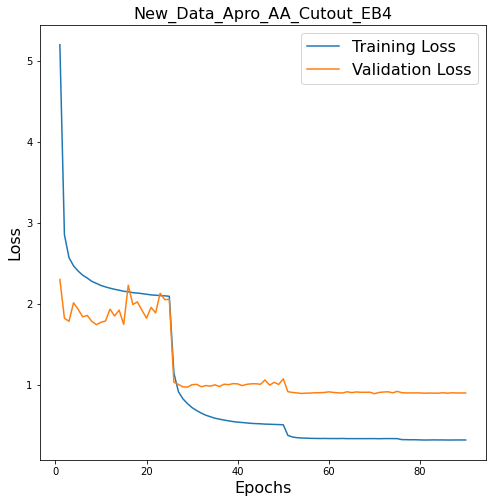

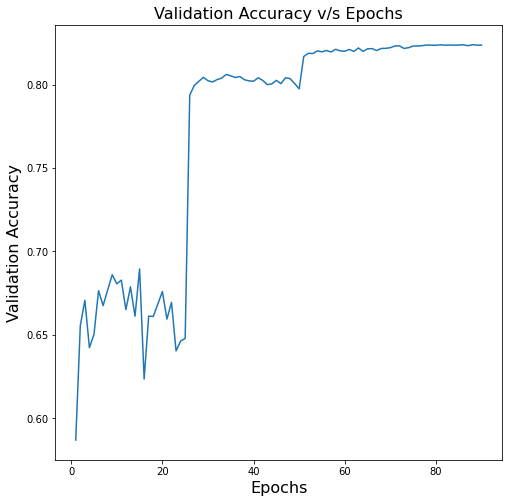

In [14]:
#### Plot Loss Curves ####/
plot_loss(epoch, train_loss, v_loss, title = 'New_Data_Apro_AA_Cutout_EB4')
plot_acc(epoch, v_acc)

In [15]:
t_loss,top1_t_acc, top5_t_acc =test_classify(model, train_dataloader, criterion, device)
print('Training Loss: {:.4f}\tTop 1 Training Accuracy: {:.4f}\t Top 5 Training Accuracy: {:.4f}'.format(t_loss, top1_t_acc, top5_t_acc))

RuntimeError: Caught RuntimeError in replica 0 on device 2.
Original Traceback (most recent call last):
  File "/home/ironman/saket/anaconda3/envs/abhishek_env/lib/python3.7/site-packages/torch/nn/parallel/parallel_apply.py", line 60, in _worker
    output = module(*input, **kwargs)
  File "/home/ironman/saket/anaconda3/envs/abhishek_env/lib/python3.7/site-packages/torch/nn/modules/module.py", line 550, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ironman/abhishek/AliProducts/architectures/efficientnet.py", line 257, in forward
    x = self.extract_features(inputs)
  File "/home/ironman/abhishek/AliProducts/architectures/efficientnet.py", line 239, in extract_features
    x = block(x, drop_connect_rate=drop_connect_rate)
  File "/home/ironman/saket/anaconda3/envs/abhishek_env/lib/python3.7/site-packages/torch/nn/modules/module.py", line 550, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ironman/abhishek/AliProducts/architectures/efficientnet.py", line 105, in forward
    x = self._swish(x)
  File "/home/ironman/saket/anaconda3/envs/abhishek_env/lib/python3.7/site-packages/torch/nn/modules/module.py", line 550, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ironman/abhishek/AliProducts/architectures/efficientnet.py", line 434, in forward
    return SwishImplementation.apply(x)
  File "/home/ironman/abhishek/AliProducts/architectures/efficientnet.py", line 422, in forward
    result = i * torch.sigmoid(i)
RuntimeError: CUDA out of memory. Tried to allocate 222.00 MiB (GPU 2; 23.65 GiB total capacity; 21.98 GiB already allocated; 92.00 MiB free; 22.74 GiB reserved in total by PyTorch)


In [10]:
v_loss, top1_acc, accuracy_dict= eval_classify(model, validation_dataloader, criterion, device)
print('Validation Loss: {:.4f}\tTop 1 Validation Accuracy: {:.4f}\nAccuracy:{}\t'.format(v_loss, top1_acc, accuracy_dict))

Validation Loss: 0.8962	Top 1 Validation Accuracy: 0.8236
Accuracy:defaultdict(<class 'int'>, {'Top 1 Accuracy': 82.35601951909092, 'Top 5 Accuracy': 95.826367083962, 'Top 10 Accuracy': 96.99397844200682, 'Top 20 Accuracy': 97.76400386032161, 'Top 30 Accuracy': 98.10518017099594, 'Top 50 Accuracy': 98.50276611072599, 'Top 100 Accuracy': 98.90918729356115})	
